## PRESSURE DATA VISUALIZATION

The purpose of this notebook is to visualize and analyze pressure data. The following tasks will be performed:
* Identify years with missing data.
* Analyze the behavior of pressure tags over time.
* Generate statistical distributions and boxplots.

### Prerequisites:
* Ensure that the preprocessing notebook (`1_preprocessamento/0.1_analise_tags_recebidas`) has been executed.

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load custom plotting functions
%run ..\..\..\funcoes_base_global\funcoes_plot.py

In [ ]:
# Define input and output paths
input_path  = os.path.join('..','1_preprocessamento','out','')
output_path = os.path.join('out','')
if not os.path.exists(output_path): 
    os.mkdir(output_path)

In [ ]:
# Define a dictionary of pressure tags for each machine
# This structure is useful for maintaining a JSON format for API integration.
tags_pressao = {
    '302B': ['PDI3513.PV', 'PI3501.PV', 'PI3506.PV', 'PIC3002.PV', 'PI3557.PV', 'PDIC3501.PV'],
    '302A': ['PDI3413.PV', 'PDI3414.PV', 'PI3401.PV', 'PI3406.PV', 'PI3417.PV', 'PIC3002.PV'],
    '301B': ['PDI3313.PV', 'PI3301.PV', 'PI3306.PV', 'PI3317.PV', 'PIC3001.PV', 'PIC3002.MODE', 'PIC3002.OUT'],
    '301A': ['PDI3213.PV', 'PI3201.PV', 'PI3206.PV', 'PI3217.PV', 'PIC3001.PV', 'PIC3002.MODE', 'PIC3002.OUT']
}

In [ ]:
# Load the pressure dataset
df = pd.read_csv(input_path + 'df_pressao.csv.gz', compression='gzip')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.head()

,PDI3413.PV,PDI3413.PV_quality,PDI3414.PV,PDI3414.PV_quality,PI3401.PV,PI3401.PV_quality,PI3406.PV,PI3406.PV_quality,PI3417.PV,PI3417.PV_quality,PIC3002.MODE,PIC3002.MODE_quality,PIC3002.OUT,PIC3002.OUT_quality,PIC3002.PV,PIC3002.PV_quality,PIC3002.SP,PIC3002.SP_quality
Date,,,,,,,,,,,,,,,,,,
2009-01-01 00:00:00,-0.698,Good,NaN,Bad,0.292,Good,NaN,NaN,0.236,Good,1,Good,0.0,Good,0.375,Good,1.3,Good
2009-01-01 00:01:00,-0.698,Good,NaN,Bad,0.292,Good,NaN,NaN,0.236,Good,1,Good,0.0,Good,0.376,Good,1.3,Good
2009-01-01 00:02:00,-0.698,Good,NaN,Bad,0.292,Good,NaN,NaN,0.236,Good,1,Good,0.0,Good,0.377,Good,1.3,Good
2009-01-01 00:03:00,-0.698,Good,NaN,Bad,0.292,Good,NaN,NaN,0.236,Good,1,Good,0.0,Good,0.377,Good,1.3,Good
2009-01-01 00:04:00,-0.698,Good,NaN,Bad,0.292,Good,NaN,NaN,0.236,Good,1,Good,0.0,Good,0.377,Good,1.3,Good


### 1. Missing Data Visualization

In [ ]:
# Create a new DataFrame with years as the index
df_year = df[tags_pressao['302A']].copy()
df_year.index = df_year.index.year

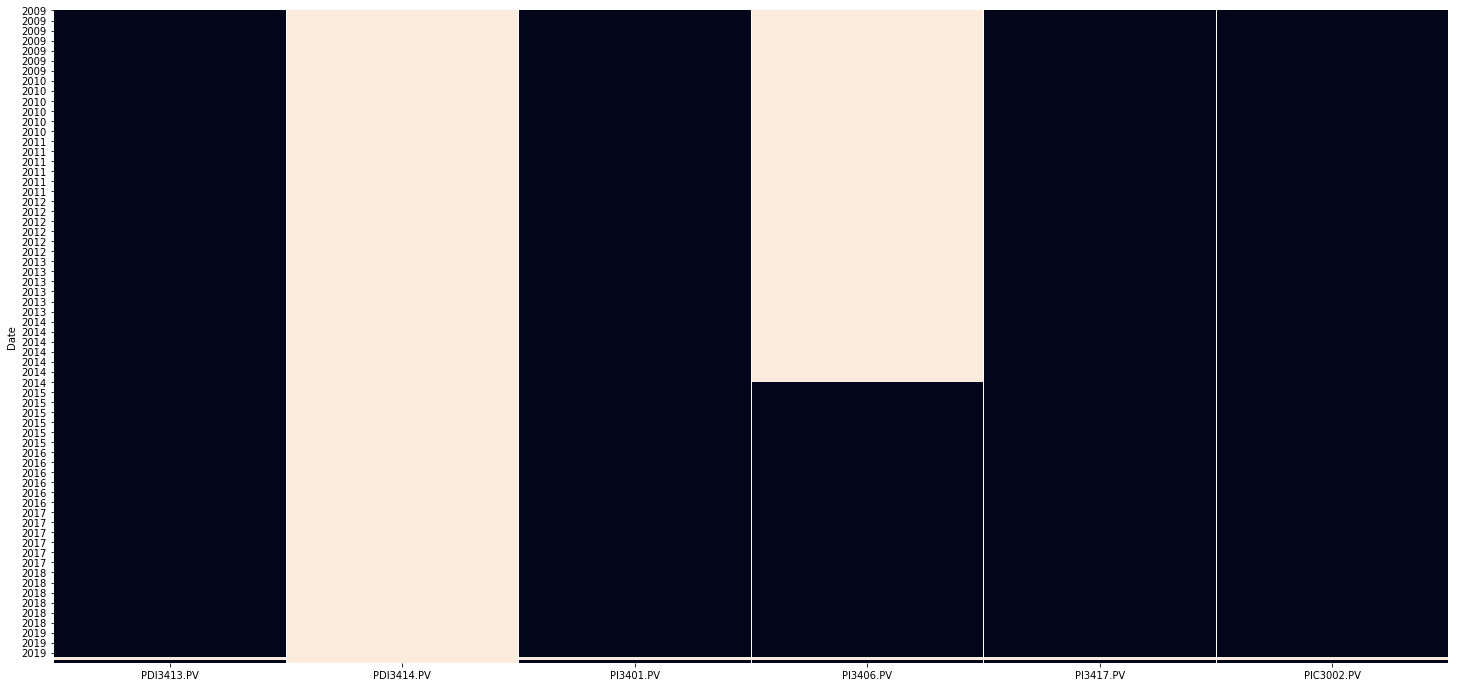

In [ ]:
# Plot a heatmap to visualize missing data
plt.figure(figsize=[25, 12])
sns.heatmap(df_year.isnull(), cbar=False)

### 2. Temporal Visualization

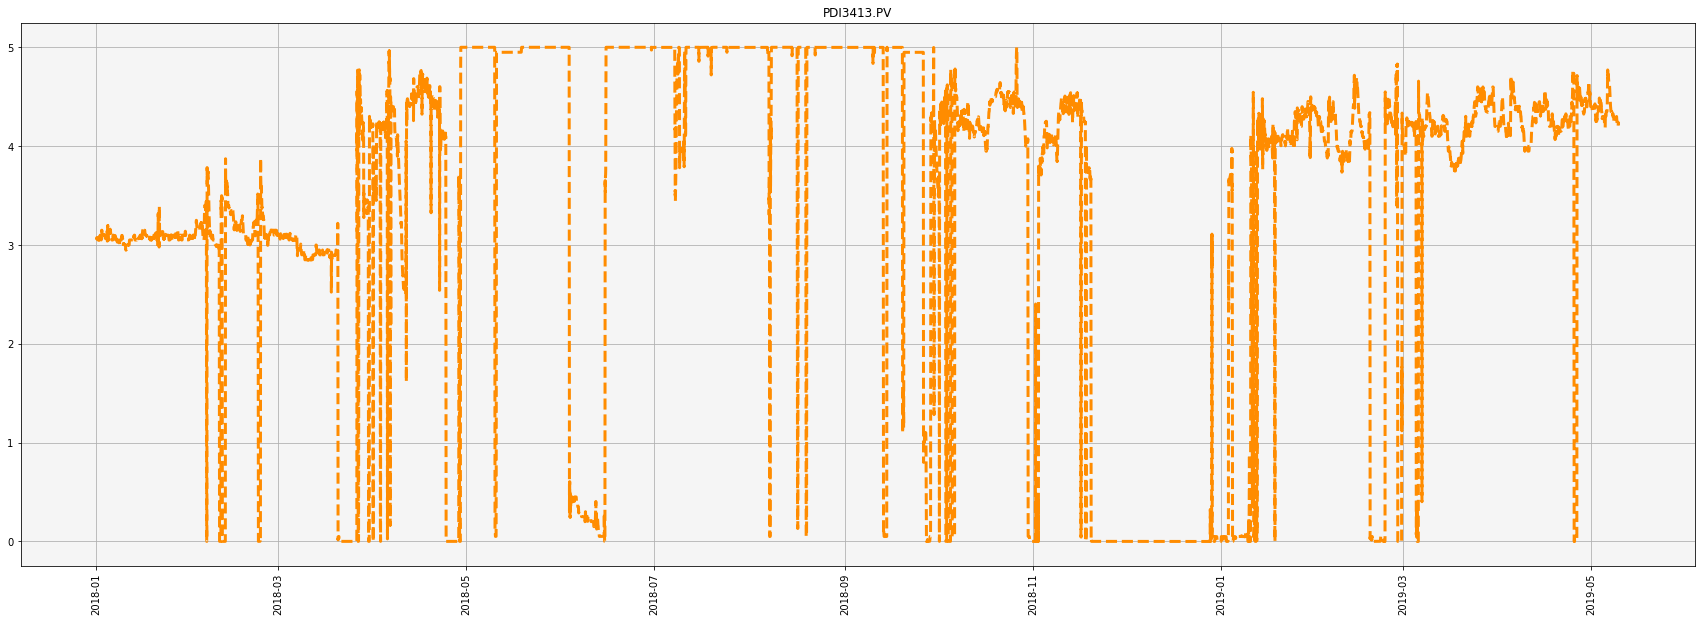

ValueError: view limit minimum -0.001 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

In [ ]:
# Define start and end dates, and the rolling window size for moving averages
start_date = '2018-01-01 00:00:00'
end_date = '2019-05-10 00:00:00'
rolling_window = 100

# Filter and compute rolling averages for the selected date range
df_filtered = df[tags_pressao['302A']][(df.index >= start_date) & (df.index <= end_date)].rolling(window=rolling_window).mean()

# Define colors for plotting
colors = ['darkorange', 'darkgreen', 'royalblue', 'salmon', 'firebrick', 'teal']

# Plot each tag
for i, tag in enumerate(tags_pressao['302A']):
    plt.figure(figsize=[30, 10])
    plt.title(tag)
    plt.plot(df_filtered[tag], color=colors[i % len(colors)], lw=3, linestyle='--')
    plt.grid(True)
    plt.show()

### 3. Statistical Visualizations

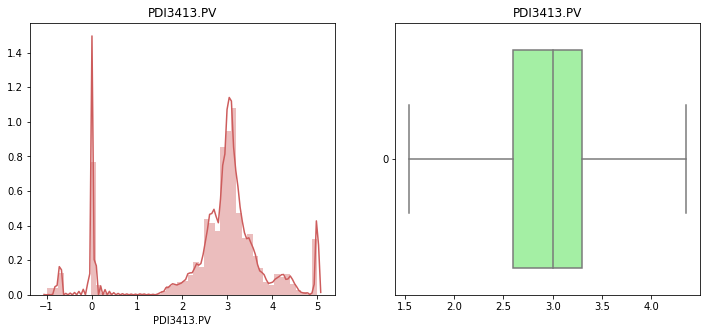

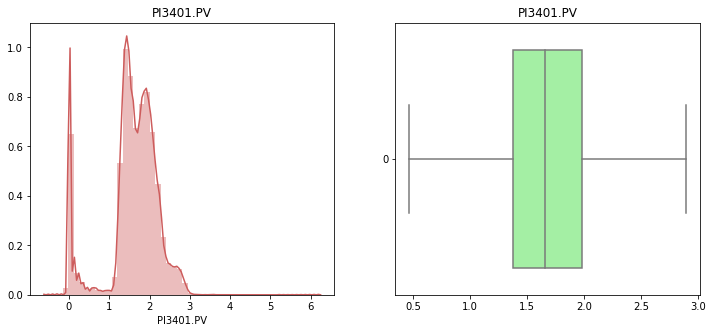

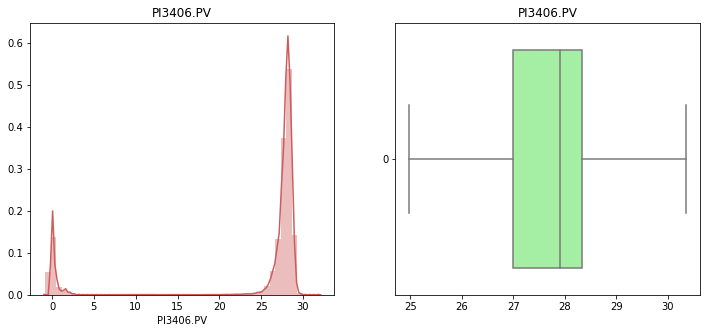

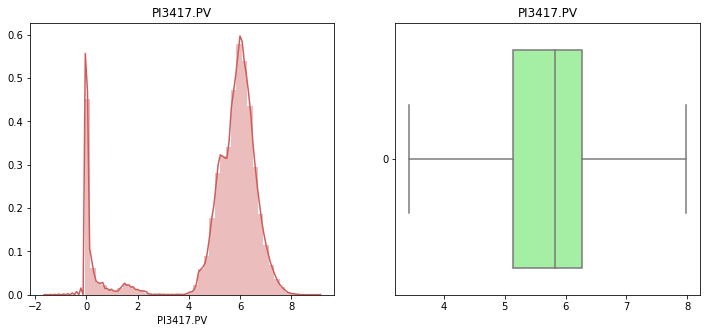

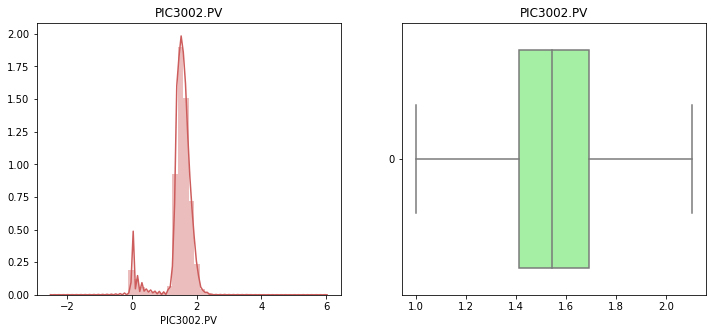

In [ ]:
# Generate distribution and boxplots for each tag
df_plot = df[tags_pressao['302A']].dropna(axis=1, how='all')
for tag in df_plot.columns:
    fig, axes = plt.subplots(1, 2, figsize=[12, 5])
    sns.histplot(df_plot[tag].dropna(), ax=axes[0], color='indianred')
    sns.boxplot(data=df_plot[tag].dropna(), ax=axes[1], orient='h', color='palegreen')
    plt.show()

### Data Selection Criteria
* Data from 2015 onwards.
* Exclude tags `PDI3413.PV` and `PDI3414.PV`.
* Apply the following filters:
  - `0.5 <= PI3401.PV <= 3`
  - `1 <= PIC3002.PV <= 3`
  - `24 <= PI3406.PV <= 31`
  - `1 <= PI3417.PV <= 8.5`

In [ ]:
# Filter the dataset based on the criteria
df_filtered = df[tags_pressao['302A']][(df.index.year >= 2015)]
df_filtered = df_filtered[(df_filtered['PIC3002.PV'] >= 1) & (df_filtered['PIC3002.PV'] <= 3)]
df_filtered = df_filtered[(df_filtered['PI3401.PV'] >= 0.5) & (df_filtered['PI3401.PV'] <= 3)]
df_filtered = df_filtered[(df_filtered['PI3406.PV'] >= 24) & (df_filtered['PI3406.PV'] <= 31)]
df_filtered = df_filtered[(df_filtered['PI3417.PV'] >= 1) & (df_filtered['PI3417.PV'] <= 8.5)]
df_filtered.drop(columns=['PDI3413.PV', 'PDI3414.PV'], inplace=True)

In [ ]:
# Save the filtered dataset
df_filtered.to_csv(output_path + 'filtered_pressure_data.csv.gz', compression='gzip')

In [ ]:
df_filtered.shape

(1999011, 4)

In [17]:
df_plot.shape

(5517491, 18)